# Covariance and Correlation

Covariance and correlation describe how two random variables are related

# Covariance

Covariance measures the extent to which the relationship between two variables is linear. The sign of the covariance shows the trend in the linear relationship between the variables, i.e if they tend to move together or in separate directions. A positive sign indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative sign indicates that the variables are inversely related, so that when one increases the other decreases. It is calculated as$$Cov(X,Y) = E[XY] - E[X]E[Y] = E[(X- E[X])(Y-E[Y])]$$

Note that$$Cov(X,X) = E[X^2] - E[X]^2 = E[(X- E[X])^2] = \sigma^2 $$

When the two variables are identical, covariance is same as variance.

# Covariance isn't that meaningful by itself

Let's say we have two variables $X$ and $Y$ and we take the covariance of the two.

In [4]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0,1]

0.14664779519886478

What does this mean? To make better sense of data, we introduce correlation

# Correlation

Correlation uses information about the variance of X and Y to normalize this metric. The value of correlation coeffecient is always between -1 and 1. Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations.

To normalize Covariance, consider

$$\frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$$$= \frac{Cov(X, Y)}{\sigma(X)\sigma(Y)} = \rho$$
where \rho is the correlation coefficient of two series $X$ and $Y$. Just like covariance, a positive coefficient indicates that the variables are directly related and a negative coefficient indicates that the variables are inversely related. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

Two random sets of data will have a correlation coefficient close to 0:

# Correlation vs. Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

In [6]:
print('Covariance of X and Y: %.2f'%np.cov(X, Y)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

Covariance of X and Y: 0.15
Correlation of X and Y: 0.99


To get a sense of what correlated data looks like, lets plot two correlated datasets

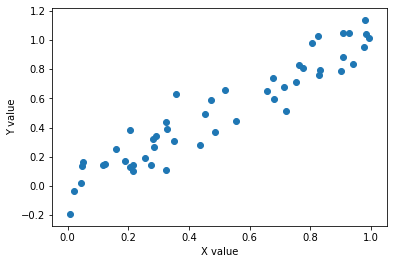

correlation of X and Y: 0.95


In [8]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

print('correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

And here's an inverse relationship



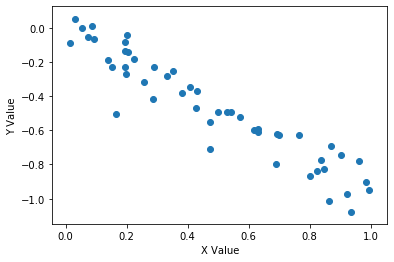

Correlation of X and Y: -0.94


In [9]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

# Applications in finance

Let's look at correlation in financial datasets. We look for correlation between prices of AAPL stock and the market (SPX) as well as another stock



In [12]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource
# Pull the pricing data for our two stocks and S&P 500
startDateStr = '2014/12/31'
endDateStr = '2017/12/31'
cachedFolderName = 'yahooData/'
dataSetId = 'testPairsTrading'
instrumentIds = ['AAPL', '^GSPC', 'LRCX']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
base = '^GSPC'
m1 = 'AAPL'
m2= 'LRCX'
bench = ds.getBookDataByFeature()['adjClose'][base]
a1= ds.getBookDataByFeature()['adjClose'][m1]
a2 = ds.getBookDataByFeature()['adjClose'][m2]
plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + startDateStr + ' to ' + endDateStr)
plt.show()
print('Correlation coefficients')
print('Correlation of %s and %s: %.2f'%(m1, m2, np.corrcoef(a1,a2)[0, 1]))
print('Correlation of %s and %s: %.2f'%(m1, base, np.corrcoef(a1, bench)[0, 1]))
print('Correlation of %s and %s: %.2f'%(m2, base, np.corrcoef(a2, bench)[0, 1]))

ModuleNotFoundError: No module named 'backtester'

Correlation coefficients

Correlation of AAPL and LRCX: 0.95

Correlation of AAPL and SPX: 0.93

Correlation of LRCX and SPX: 0.96

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series.

Another application is to find uncorrelated assets to produce hedged portfolios - if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined.

# Important: Significance of Correlation

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, we are not aware if the variables are normally distributed or not. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, we may be led to believe that two stocks have a relationship because of their high correlation, when in fact they are both caused by a third(market)

The problem is we may determine a good correlation by picking the right time period but it may not hold out of sample. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient.

As an example, remember that the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.95. Let's take the rolling 60 day correlation between the two to see how that varies.

In [13]:
rolling_correlation = pd.rolling_corr(a1, a2, 60)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
plt.show()

AttributeError: module 'pandas' has no attribute 'rolling_corr'

# Confidence Intervals

We mentioned in the notebook on Expected Value and Standard Deviation that statistics derived from a sample (data available to us) may differ from true value (population statistic). For example, we want to measure the population mean, but we can only calculate a sample mean. We then want to use the sample mean to estimate the population mean. We use confidence intervals in an attempt to determine how accurately our sample mean estimates the population mean.

A confidence interval gives an estimated range of values between which the variable is likely to lie. This range is calculated from a given set of data or from a probability distribution The selection of a confidence level for the interval determines the probability that the confidence interval will contain the value of the variable over many computations(read subtelty note below). So, a 95% confidence interval for a variable states that the interval will contain the true population mean 95% of the time.

For example, if you want to estimate the average height of students in a university, you might do this by measuring 100 students and estimating that the mean of that sample was close to the population. Let's try that.

In [14]:
np.random.seed(100)

# Let's define some 'true' population parameters, we'll pretend we don't know these.
POPULATION_MU = 64
POPULATION_SIGMA = 5

# Generate our sample by drawing from the population distribution
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
mean_height = np.mean(heights)
print('sample mean: %.2f'%mean_height)

sample mean: 63.48


Unfortunately simply reporting the sample mean doesn't do much for us, as we don't know how it relates to the population mean. To get a sense for how it might relate, we can look for how much variance there is in our sample. Higher variance indicates instability and uncertainty.

In [15]:
print('sample standard deviation: %.2f'%np.std(heights))


sample standard deviation: 4.85


This still doesn't help, to really get a sense of how our sample mean relates to the population mean we need to compute a standard error. The standard error is a measure of the variance of the sample mean.



### IMPORTANT Computing a standard error involves assuming that the way you sample is unbaised, and that the data are normal and independent. If these conditions are violated, your standard error will be wrong. There are ways of testing for this and correcting.

  

The formula for standard error is.

$$SE = \frac{\sigma}{\sqrt{n}}$$
Where $\sigma$ is the sample standard deviation and $n$ is the number of samples.

In [16]:
SE = np.std(heights) / np.sqrt(sample_size)
print('standard error: %.2f'%SE)

standard error: 0.48


Assuming our data are normally distributed, we can use the standard error to compute our confidence interval.

To do this we set the desired confidence level (say 95%) and determine 95% of data lies within a range how many standard deviations of mean for our data's distribution.

For example, for a normal distributiom, 95% of the observations lie in a range$[-1.96*SE,1.96*SE]$ around the mean. When the samples are large enough (generally > 30 is taken as a threshold) the Central Limit Theorem applies and normality can be safely assumed; if sample sizes are smaller, a safer approach is to use a $t$-distribution with appropriately specified degrees of freedom. The actual way to compute the values is by using a cumulative distribution function (CDF). If you need more background on Probability Distributions, CDFs and inverse CDFs, read about them here and here. Look here for information on the $t$-distribution. We can check the 95% number using one of the Python functions.

NOTE: Be careful when applying the Central Limit Theorem, however, as many datasets in finance are fundamentally non-normal and it is not safe to apply the theorem casually or without attention to subtlety.

We can visualize the 95% mass bounds here.

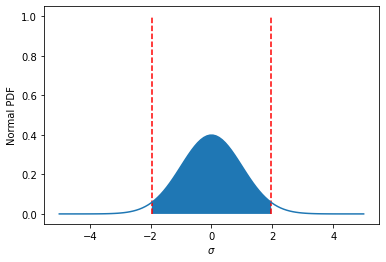

In [17]:
#Generate a normal distribution
x = np.linspace(-5,5,100)
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

# Plot the intervals
plt.vlines(-1.96, 0, 1, colors='r', linestyles='dashed')
plt.vlines(1.96, 0, 1, colors='r', linestyles='dashed')

fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)

plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF')
plt.show()

Now, rather than reporting our sample mean without any sense of the probability of it being correct, we can compute an interval and be much more confident that the population mean lies in that interval. To do this we take our sample mean $\mu$ and report $\left(\mu-1.96 SE , \mu+1.96SE\right)$.

This works because assuming normality, that interval will contain the population mean 95% of the time.